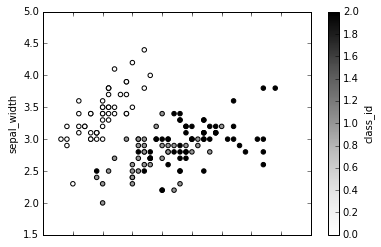

In [16]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

%matplotlib inline

config = dict()
config['resource_dir'] = "../resources/"
config['raw_file'] = config['resource_dir'] + "iris.data.csv"

iris_df = pd.read_csv(config['raw_file'],header=None)
iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

class_list = iris_df['class'].drop_duplicates().tolist()
iris_df['class_id'] = iris_df['class'].map(lambda x: class_list.index(x))

iris_df.plot.scatter(x='sepal_length',y='sepal_width',c='class_id')

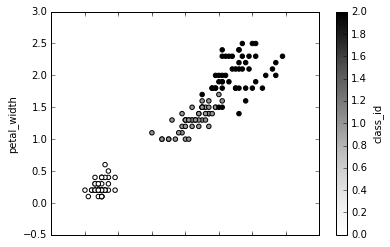

In [17]:
iris_df.plot.scatter(x='petal_length',y='petal_width', c='class_id')

In [5]:
iris_grp_df = iris_df.groupby('class')
print iris_grp_df

In [19]:
svc = svm.SVC(kernel='linear')
X = iris_df[['petal_length','petal_width']]
y = iris_df['class_id']
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

plot_estimator(svc, X, y)

TypeError: unhashable type